### Nama : Giovanny Halimko
### NIM : 2211110058
### Topik : Klassifikasi penumpang selamat atau tidak selamat pada kapal Titanic

# Data Loading and Library Importing

Melakukan import library yang dibutuhkan

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

Berikut Link dataset : https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

Melakukan pembacaan dataset yang akan digunakan dan menampilkan 5 data teratas

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Understanding dengan teknik EDA(Exploratory Data Analysis) Dan Data Preprocessing

| Variabel  | Definisi                     | Kunci                                             | Catatan Variabel                                         |
|-----------|------------------------------|---------------------------------------------------|----------------------------------------------------------|
| survival  | Kelangsungan Hidup           | 0 = Tidak, 1 = Ya                                 |                                                          |
| pclass    | Kelas Tiket                  | 1 = Atas, 2 = Menengah, 3 = Bawah                  | Proksi untuk status sosial-ekonomi (SES)                   |
| sex       | Jenis Kelamin                |                                                   |                                                          |
| Age       | Usia dalam tahun             |                                                   | Usia bersifat fraksional jika kurang dari 1. Jika diperkirakan, dalam bentuk xx.5 |
| sibsp     | # saudara/pasangan di kapal  |                                                   | Hubungan keluarga: Sibling = saudara, saudari, saudara tiri, saudari tiri |
| parch     | # orangtua/anak di kapal     |                                                   | Hubungan keluarga: Parent = ibu, ayah, Child = anak perempuan, anak laki-laki, anak tiri. Parch=0 untuk anak-anak yang bepergian dengan pengasuh. |
| ticket    | Nomor Tiket                  |                                                   |                                                          |
| fare      | Tarif Penumpang              |                                                   |                                                          |
| cabin     | Nomor Kabin                  |                                                   |                                                          |
| embarked  | Pelabuhan Keberangkatan       | C = Cherbourg, Q = Queenstown, S = Southampton    |                                                          |



Dari dataset dapat dilihat terdapat 891 record dengan 12 fitur

In [3]:
df.shape

(891, 12)

Melakukan pengecekan terhadap missing value untuk dilakukan penanganan selanjutnya, dapat dilihat bahwa terdapat missing value pada kolom 'Age', 'Cabin', dan 'Embarked'

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Melakukan analisis statistik deskriptif dari dataset, dengan melihat nilai rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum

In [5]:
round(df.describe(),1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


Dari hasil analisis deskriptif, dapat dilihat bahwa :
- Rata-rata umur penumpang adalah 29.7 tahun
- Tarif penumpang rata-rata adalah 32.2
- Penumpang termuda berumur dibawah 1 tahun
- Penumpang tertua berumur 80 tahun

kita akan melakukan drop terhadap kolom 'Cabin' karena terdapat banyak missing value pada kolom tersebut

In [6]:
df = df.drop(['Cabin'], axis=1)

Selanjutnya kita akan mengisi missing value pada kolom 'Age' dengan nilai rata-rata dari kolom tersebut

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

Selanjutnya kita akan mengisi missing value pada kolom 'Embarked' dengan modus dari kolom tersebut

In [8]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Kemudian lihat hasil dari dataset yang sudah diolah, dimana sudah tidak terdapat missing value pada dataset

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Melakukan drop terhadap kolom 'Name', 'Ticket', dan 'PassengerId' karena kolom tersebut tidak diperlukan dalam proses analisis

In [10]:
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Melakukan konversi data kategorikal menjadi data numerik dengan menggunakan label encoder

In [11]:
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


Selanjutnya melakukan konversi data kategorikal menjadi data numerik dengan menggunakan metode label encoding pada kolom Embarked

In [12]:
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Melakukan visualisasi korelasi antara variabel fitur dengan label target, dimana dapat dilihat bahwa fitur SibSp, Age, dan Parch memiliki korelasi yang rendah dengan label target sehingga fitur tersebut akan dihapus

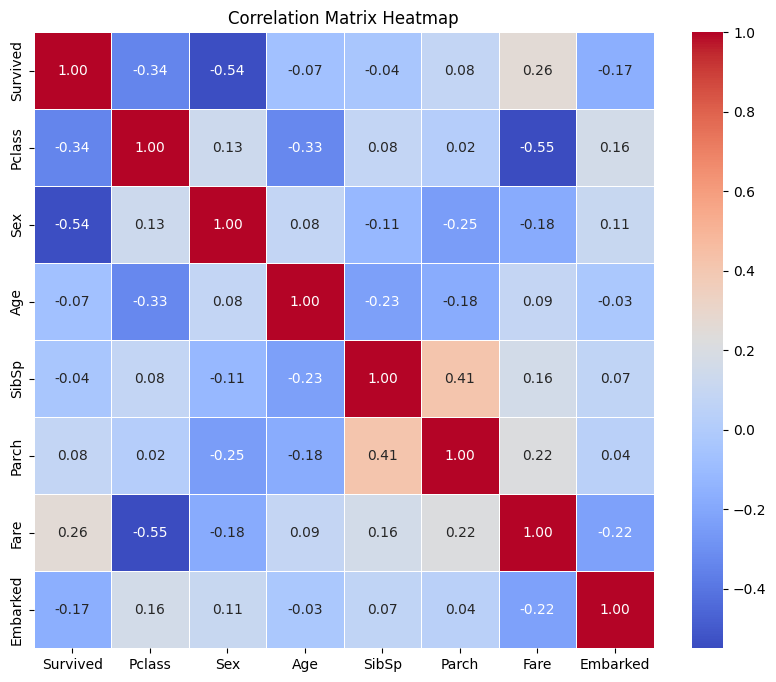

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Melakukan hapus terhadap kolom 'SibSp', 'Age', dan 'Parch' karena memiliki korelasi yang rendah dengan label target, yakni dibawah 0.1 baik arah positif maupun negatif

In [14]:
df.drop(['SibSp', 'Age', 'Parch'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,1,7.2500,2
1,1,1,0,71.2833,0
2,1,3,0,7.9250,2
3,1,1,0,53.1000,2
4,0,3,1,8.0500,2


Menuliskan dataset yang sudah dibersihkan dari dirty data kedalam file csv baru

In [15]:
df.to_csv('titanic_cleaned.csv', index=False)

# Modelling dan Evaluasi

Memisahkan variabel independen dan variabel dependen

In [16]:
x = df.drop(columns='Survived')
y = df['Survived']

Data Splitting :
- 80% data training
- 10% data validation
- 10% data testing

kita split data kita menjadi 80% training 10% validation dan 10% testing

In [17]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=4)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=4)

Cek shape dari data training dan testing

In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(712, 4)
(712,)
(89, 4)
(89,)
(90, 4)
(90,)


Melakukan Standarisasi pada data agar bernilai antara -3 dan +3, disini dilakukan fitting pada data training dan transform hanya pada data testing dan validation.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

Membuat model dan melakukan training

Penjelasan tentang hyperparameter:
- n_estimators:

**Definisi**: Jumlah pohon (trees) dalam model random forest.

**Penjelasan**: Menambah jumlah pohon secara umum meningkatkan kinerja model, namun juga meningkatkan biaya komputasional. Ini adalah hyperparameter penting, dan nilai optimalnya tergantung pada dataset yang digunakan. Dalam bagian ini dipilih nilai 5 karena data yang digunakan tergolong tidak terlalu kompleks untuk menghindari overfitting.

- random_state:

**Definisi**: Mengontrol tingkat keacakan dari random forest.

**Penjelasan**: Menetapkan parameter random_state ke suatu nilai tertentu memastikan hasil yang dapat direproduksi. Dengan mengatur random_state ke nilai yang sama, Anda akan mendapatkan serangkaian bilangan acak yang sama setiap kali model dilatih. Ini berguna untuk tujuan debugging dan membuat hasil lebih dapat direproduksi.

In [20]:
classifier = RandomForestClassifier(n_estimators=10, random_state=4)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=4)

Melakukan transformasi pada data testing dan data validation untuk digunakan dalam proses evaluasi

In [21]:
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

Menggunakan fungsi classification_report untuk menampilkan hasil evaluasi

In [22]:
print(classification_report(y_true=y_train, y_pred=classifier.predict(x_train), zero_division=0))
print(classification_report(y_true=y_val, y_pred=classifier.predict(x_val), zero_division=0))
print(classification_report(y_true=y_test, y_pred=classifier.predict(x_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       430
           1       0.93      0.81      0.87       282

    accuracy                           0.90       712
   macro avg       0.91      0.88      0.89       712
weighted avg       0.90      0.90      0.90       712

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        68
           1       0.70      0.67      0.68        21

    accuracy                           0.85        89
   macro avg       0.80      0.79      0.79        89
weighted avg       0.85      0.85      0.85        89

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        51
           1       0.78      0.64      0.70        39

    accuracy                           0.77        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.77      0.77      0.76        90



Dapat dilihat bahwa model memiliki performa yang cukup baik dengan nilai precision, recall, dan f1-score diatas 0.8 dan accuracy diatas 0.8 pada data validation dan training. serta performa yang baik pada data testing walau tidak sebaik pada data training dan validation

Melakukan Prediksi dengan model yang sudah dibuat

In [23]:
predictions = classifier.predict(x_test)

df_test = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

df_test.head(10)

,Actual,Predicted
751,1,0
496,1,1
577,1,1
481,0,0
578,0,1
34,0,0
842,1,1
65,1,0
876,0,0
115,0,0


Dapat dilihat pada hasil prediksi bahwa model sudah dapat memprediksi dengan baik dimana dari 10 data testing, 7 data berhasil diprediksi dengan benar

Untuk kasus ini dimana dataset hanya memiliki 2 kelas dan sebanyak 891 record serta fitur yang tidak terlalu kompleks , maka model Random Forest Classifier sudah cukup baik dalam memprediksi apakah seseorang selamat atau tidak selamat dari kecelakaan kapal Titanic.

# Kesimpulan

Dari hasil analisis yang telah dilakukan, dapat disimpulkan bahwa model Random Forest Classifier yang telah dibuat memiliki performa yang cukup baik dalam memprediksi apakah seseorang selamat atau tidak selamat dari kecelakaan kapal Titanic. Model memiliki performa yang baik pada data testing walau tidak sebaik pada data training dan validation.